In [1]:
import opendatasets as od
od.download('https://www.kaggle.com/competitions/classification-of-oil-and-gas-fields')

100%|██████████| 24.4k/24.4k [00:00<00:00, 368kB/s]


Extracting archive .\classification-of-oil-and-gas-fields/classification-of-oil-and-gas-fields.zip to .\classification-of-oil-and-gas-fields


In [1]:
# иморитирование всех необходимых библиотек
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Считываем тренировочные данные
train = pd.read_csv("./classification-of-oil-and-gas-fields/train_oil.csv")
test = pd.read_csv("./classification-of-oil-and-gas-fields/oil_test.csv")

print(f"Train dataset shape: {train.shape}")
print(f"Test dataset shape: {test.shape}")

Train dataset shape: (309, 20)
Test dataset shape: (133, 19)


In [3]:
train.head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train.drop(columns=['Onshore/Offshore']), train['Onshore/Offshore'], test_size=0.2, random_state=42, stratify=train['Onshore/Offshore'])

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 88 to 20
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Field name                      247 non-null    object 
 1   Reservoir unit                  247 non-null    object 
 2   Country                         224 non-null    object 
 3   Region                          216 non-null    object 
 4   Basin name                      216 non-null    object 
 5   Tectonic regime                 247 non-null    object 
 6   Latitude                        224 non-null    float64
 7   Longitude                       222 non-null    float64
 8   Operator company                247 non-null    object 
 9   Hydrocarbon type                247 non-null    object 
 10  Reservoir status                247 non-null    object 
 11  Structural setting              247 non-null    object 
 12  Depth                           247 non-n

In [6]:
X_train[(X_train['Latitude'].isna()==False) & (X_train['Longitude'].isna()==False) & (X_train['Region'].isna()==True)].head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
16,HEERA,BASSEIN (ZONE B),INDIA,NaN,NaN,EXTENSION,18.1720,72.3130,ONGC,OIL,DECLINING PRODUCTION,PASSIVE MARGIN,4542,PALEOGENE,LIMESTONE,230.0,82.0,12.0,0.8
40,NORTH WARD-ESTES,YATES,USA,NaN,NaN,COMPRESSION,31.5777,-102.9918,WHITING OIL and GAS,OIL,REJUVENATING,FORELAND,2600,PERMIAN,SILTSTONE,300.0,100.0,11.0,16.0
229,URENGOY,POKUR (PK1-6),RUSSIA,NaN,NaN,COMPRESSION,66.0533,76.9497,TYUMENNEFTEGAZ,GAS,DECLINING PRODUCTION,INTRACRATONIC,3514,CRETACEOUS,SANDSTONE,700.0,440.0,30.0,330.0
226,DURI,DURI (RINDU SAND),INDONESIA,NaN,NaN,INVERSION/STRIKE-SLIP/TRANSPRESSION/EXTENSION/BASEMENT-I,1.2956,101.2304,CALTEX PACIFIC INDONESIA,OIL,MATURE PRODUCTION,INVERSION/BACKARC,220,NEOGENE,SANDSTONE,120.0,52.0,32.0,1900.0
21,GIDGEALPA,HUTTON,AUSTRALIA,NaN,NaN,INVERSION/COMPRESSION/EXTENSION,-28.0000,140.0000,SANTOS,OIL,PLATEAU PRODUCTION,INTRACRATONIC,5392,JURASSIC,SANDSTONE,600.0,50.0,18.0,1000.0


**DeepSeek подсказал, как на основе долготы и широты восстановить название региона**

In [81]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from tqdm import tqdm

def fill_missing_regions_enhanced(df, latitude_col='Latitude', longitude_col='Longitude', 
                                region_col='Region', country_col='Country'):
    """
    Улучшенная версия функции для заполнения регионов:
    1. Использует более гибкие запросы к геокодеру
    2. Учитывает страну при поиске
    3. Имеет дополнительные fallback-варианты
    """
    geolocator = Nominatim(user_agent="enhanced_region_filler")
    geocode = RateLimiter(geolocator.reverse, min_delay_seconds=1)
    
    for idx in tqdm(df[df[region_col].isna()].index, desc="Заполнение регионов"):
        lat = df.at[idx, latitude_col]
        lon = df.at[idx, longitude_col]
        country = df.at[idx, country_col]
        
        if pd.isna(lat) or pd.isna(lon):
            continue
            
        try:
            # Пробуем разные варианты запросов
            location = geocode((lat, lon), exactly_one=True, language="en")
            
            if location:
                address = location.raw.get('address', {})
                
                # Вариант 1: Административный регион (штат, провинция)
                region = address.get('state', '')
                
                # Вариант 2: Для морских месторождений - используем ближайшую территорию
                if not region and 'sea' in address.get('display_name', '').lower():
                    region = f"Offshore {country}"
                
                # Вариант 3: Для UK - используем ближайший county
                if not region and country == 'UK':
                    region = address.get('county', '')
                
                # Вариант 4: Любой регион из адреса
                if not region:
                    region = address.get('region', '')
                
                # Вариант 5: Если ничего не найдено, используем страну
                if not region:
                    region = country
                
                df.at[idx, region_col] = region
                
        except Exception as e:
            print(f"\nОшибка для координат ({lat}, {lon}): {e}")
            continue
    
    # Заполняем оставшиеся пропуски страной
    df[region_col] = df[region_col].fillna(df[country_col])
    
    return df

X_train = fill_missing_regions_enhanced(X_train)

Заполнение регионов: 100%|██████████| 23/23 [00:00<?, ?it/s]


In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 88 to 20
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Field name                      247 non-null    object 
 1   Reservoir unit                  247 non-null    object 
 2   Country                         224 non-null    object 
 3   Region                          224 non-null    object 
 4   Basin name                      216 non-null    object 
 5   Tectonic regime                 247 non-null    object 
 6   Latitude                        224 non-null    float64
 7   Longitude                       222 non-null    float64
 8   Operator company                247 non-null    object 
 9   Hydrocarbon type                247 non-null    object 
 10  Reservoir status                247 non-null    object 
 11  Structural setting              247 non-null    object 
 12  Depth                           247 non-n

In [9]:
X_train[(X_train['Latitude'].isna()==False) & (X_train['Longitude'].isna()==True) & (X_train['Region'].isna()==False)].head()

,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
160,QARUN,LOWER BAHARIYA,EGYPT,AFRICA,GINDI,INVERSION/COMPRESSION/EXTENSION,29.7830,NaN,QARUN PETROLEUM,OIL,DEVELOPING,INVERSION/RIFT,8450,CRETACEOUS,LOW-RESISTIVITY SANDSTONE,145.0,45.0,18.0,700.0
232,BARQUE,LEMAN SANDSTONE,UK,EUROPE,NORTH SEA SOUTHERN,INVERSION/COMPRESSION/EXTENSION/EVAPORITE/GRAVITY,53.6204,NaN,SHELL,GAS,DECLINING PRODUCTION,SUB-SALT/INVERSION,6900,PERMIAN,SANDSTONE,750.0,570.0,11.0,0.5


**DeepSeek подсказал, как на основе региона и широты восстановить долготу**

In [80]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from tqdm import tqdm

def fill_missing_longitude_simple(df):
    """
    Упрощённая версия с ослабленными условиями:
    - Увеличенный допуск по широте (до 5°)
    - Приоритет более общим запросам
    - Повторные попытки для сложных случаев
    """
    geolocator = Nominatim(user_agent="simple_longitude_filler")
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)  # Уменьшили задержку
    
    for idx in df[df['Longitude'].isna()].index:
        field = df.at[idx, 'Field name']
        country = df.at[idx, 'Country']
        basin = df.at[idx, 'Basin name']
        lat = df.at[idx, 'Latitude']
        
        # Ослабленные запросы (ищем сначала по общим признакам)
        queries = [
            f"{basin} basin {country}",  # Приоритет бассейну
            f"{field} {country}",
            f"{field} oil field",
            country  # Последний вариант - только страна
        ]
        
        for query in queries:
            try:
                location = geocode(query)
                if location:
                    # Очень мягкая проверка широты (±5°)
                    if abs(location.latitude - lat) < 5:
                        df.at[idx, 'Longitude'] = location.longitude
                        break
                        
                # Дополнительная попытка с приблизительной широтой
                location = geocode(f"{query} {lat}°N")
                if location:
                    df.at[idx, 'Longitude'] = location.longitude
                    break
                    
            except:
                continue

    # Заполняем оставшиеся пропуски медианой по стране
    country_median = df.groupby('Country')['Longitude'].median()
    df['Longitude'] = df['Longitude'].fillna(df['Country'].map(country_median))
    
    return df

X_train = fill_missing_longitude_simple(X_train)

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 88 to 20
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Field name                      247 non-null    object 
 1   Reservoir unit                  247 non-null    object 
 2   Country                         224 non-null    object 
 3   Region                          224 non-null    object 
 4   Basin name                      216 non-null    object 
 5   Tectonic regime                 247 non-null    object 
 6   Latitude                        224 non-null    float64
 7   Longitude                       224 non-null    float64
 8   Operator company                247 non-null    object 
 9   Hydrocarbon type                247 non-null    object 
 10  Reservoir status                247 non-null    object 
 11  Structural setting              247 non-null    object 
 12  Depth                           247 non-n

**Восстановить название страны, региона и бассейна не представляется возможным без широты и долготы**

In [82]:
X_train['Country'] = X_train['Country'].fillna('Unknown')
X_train['Region'] = X_train['Region'].fillna('Unknown')
X_train['Basin name'] = X_train['Basin name'].fillna('Unknown')
X_train['Latitude'] = X_train['Latitude'].fillna('-1')
X_train['Longitude'] = X_train['Longitude'].fillna('-1')

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 88 to 20
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Field name                      247 non-null    object 
 1   Reservoir unit                  247 non-null    object 
 2   Country                         247 non-null    object 
 3   Region                          247 non-null    object 
 4   Basin name                      247 non-null    object 
 5   Tectonic regime                 247 non-null    object 
 6   Latitude                        247 non-null    object 
 7   Longitude                       247 non-null    object 
 8   Operator company                247 non-null    object 
 9   Hydrocarbon type                247 non-null    object 
 10  Reservoir status                247 non-null    object 
 11  Structural setting              247 non-null    object 
 12  Depth                           247 non-n

In [14]:
X_train['Tectonic regime'].apply(lambda x: x.split('/')).explode().unique()

array(['COMPRESSION', 'EVAPORITE', 'EXTENSION', 'LINKED', 'EROSION',
       'STRIKE-SLIP', 'TRANSTENSION', 'BASEMENT-I', 'INVERSION',
       'GRAVITY', 'SHALE', 'TRANSPRESSION', 'DIAPIR', 'SYNSEDIMENTATION',
       'REACTIVATION', 'UPLIFT'], dtype=object)

**Создадим отдельные колонки 'COMPRESSION', 'EROSION', 'GRAVITY', 'EVAPORITE', 'EXTENSION',
       'SYNSEDIMENTATION', 'LINKED', 'INVERSION', 'STRIKE-SLIP',
       'TRANSPRESSION', 'BASEMENT-I', 'SHALE', 'TRANSTENSION', 'DIAPIR',
       'UPLIFT', 'REACTIVATION'**

In [83]:
X_train['COMPRESSION'] = X_train['Tectonic regime'].apply(lambda x: 1 if 'COMPRESSION' in x else 0)
X_train['EROSION'] = X_train['Tectonic regime'].apply(lambda x: 1 if 'EROSION' in x else 0)
X_train['GRAVITY'] = X_train['Tectonic regime'].apply(lambda x: 1 if 'GRAVITY' in x else 0)
X_train['EVAPORITE'] = X_train['Tectonic regime'].apply(lambda x: 1 if 'EVAPORITE' in x else 0)
X_train['EXTENSION'] = X_train['Tectonic regime'].apply(lambda x: 1 if 'EXTENSION' in x else 0)
X_train['SYNSEDIMENTATION'] = X_train['Tectonic regime'].apply(lambda x: 1 if 'SYNSEDIMENTATION' in x else 0)
X_train['LINKED'] = X_train['Tectonic regime'].apply(lambda x: 1 if 'LINKED' in x else 0)
X_train['INVERSION'] = X_train['Tectonic regime'].apply(lambda x: 1 if 'INVERSION' in x else 0)
X_train['STRIKE-SLIP'] = X_train['Tectonic regime'].apply(lambda x: 1 if 'STRIKE-SLIP' in x else 0)
X_train['TRANSPRESSION'] = X_train['Tectonic regime'].apply(lambda x: 1 if 'TRANSPRESSION' in x else 0)
X_train['BASEMENT-I'] = X_train['Tectonic regime'].apply(lambda x: 1 if 'BASEMENT-I' in x else 0)
X_train['SHALE'] = X_train['Tectonic regime'].apply(lambda x: 1 if 'SHALE' in x else 0)
X_train['TRANSTENSION'] = X_train['Tectonic regime'].apply(lambda x: 1 if 'TRANSTENSION' in x else 0)
X_train['DIAPIR'] = X_train['Tectonic regime'].apply(lambda x: 1 if 'DIAPIR' in x else 0)
X_train['UPLIFT'] = X_train['Tectonic regime'].apply(lambda x: 1 if 'UPLIFT' in x else 0)
X_train['REACTIVATION'] = X_train['Tectonic regime'].apply(lambda x: 1 if 'REACTIVATION' in x else 0)
X_train.drop(columns=['Tectonic regime'], inplace=True)

In [16]:
X_train['Structural setting'].apply(lambda x: x.split('/')).explode().unique()

array(['THRUST', 'FORELAND', 'RIFT', 'WRENCH', 'SUB-THRUST', 'INVERSION',
       'PASSIVE MARGIN', 'INTRACRATONIC', 'SALT', 'BACKARC', 'DELTA',
       'SUB-SALT', 'FOREARC'], dtype=object)

**Создадим отдельные колонки 'SALT', 'FORELAND', 'DELTA', 'PASSIVE MARGIN', 'RIFT',
       'SUB-THRUST', 'INTRACRATONIC', 'THRUST', 'SUB-SALT', 'INVERSION',
       'BACKARC', 'FOREARC', 'WRENCH'**

In [84]:
X_train['SALT'] = X_train['Structural setting'].apply(lambda x: 1 if 'SALT' in x else 0)
X_train['FORELAND'] = X_train['Structural setting'].apply(lambda x: 1 if 'FORELAND' in x else 0)
X_train['DELTA'] = X_train['Structural setting'].apply(lambda x: 1 if 'DELTA' in x else 0)
X_train['PASSIVE MARGIN'] = X_train['Structural setting'].apply(lambda x: 1 if 'PASSIVE MARGIN' in x else 0)
X_train['RIFT'] = X_train['Structural setting'].apply(lambda x: 1 if 'RIFT' in x else 0)
X_train['SUB-THRUST'] = X_train['Structural setting'].apply(lambda x: 1 if 'SUB-THRUST' in x else 0)
X_train['INTRACRATONIC'] = X_train['Structural setting'].apply(lambda x: 1 if 'INTRACRATONIC' in x else 0)
X_train['THRUST'] = X_train['Structural setting'].apply(lambda x: 1 if 'THRUST' in x else 0)
X_train['SUB-SALT'] = X_train['Structural setting'].apply(lambda x: 1 if 'SUB-SALT' in x else 0)
X_train['INVERSION'] = X_train['Structural setting'].apply(lambda x: 1 if 'INVERSION' in x else 0)
X_train['BACKARC'] = X_train['Structural setting'].apply(lambda x: 1 if 'BACKARC' in x else 0)
X_train['FOREARC'] = X_train['Structural setting'].apply(lambda x: 1 if 'FOREARC' in x else 0)
X_train['WRENCH'] = X_train['Structural setting'].apply(lambda x: 1 if 'WRENCH' in x else 0)
X_train.drop(columns=['Structural setting'], inplace=True)

**Столбцы название месторождения, название компании и страна больше не информативны**

In [85]:
X_train.drop(columns=['Field name', 'Operator company', 'Country'], inplace=True)

**Кодируем категориальные переменные**

In [86]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoder.fit(X_train[['Reservoir unit', 'Region', 'Basin name', 'Hydrocarbon type', 'Reservoir status', 'Reservoir period', 'Lithology']])
X_train_encoded = encoder.transform(X_train[['Reservoir unit', 'Region', 'Basin name', 'Hydrocarbon type', 'Reservoir status', 'Reservoir period', 'Lithology']])
feature_names = encoder.get_feature_names_out(['Reservoir unit', 'Region', 'Basin name', 'Hydrocarbon type', 'Reservoir status', 'Reservoir period', 'Lithology'])
X_train_encoded = pd.DataFrame(X_train_encoded, columns=feature_names, index=X_train.index)
X_train_final = pd.concat([X_train.drop(['Reservoir unit', 'Region', 'Basin name', 'Hydrocarbon type', 'Reservoir status', 'Reservoir period', 'Lithology'], axis=1).reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1)

In [87]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [88]:
le.classes_

array(['OFFSHORE', 'ONSHORE', 'ONSHORE-OFFSHORE'], dtype=object)

In [89]:
pd.DataFrame(y_train).value_counts(ascending=False)[1]

174

**Попытаемся устранить дисбаланс классов**

In [90]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy={2: round(pd.DataFrame(y_train).value_counts(ascending=False)[1]*0.8), 0: round(pd.DataFrame(y_train).value_counts(ascending=False)[1]*0.8)}, random_state=42, k_neighbors=2, n_jobs=1)
X_res, y_res = smote.fit_resample(X_train_final, y_train)

**С валидационной выборкой и последующими данными нужно сделать те же действия по преобразованию. Для этого реализуем пайплан и переобучим его на исходной тренировачной выборке**

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
class fill_missing_regions_enhanced(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # Мы не нуждаемся в обучении для этой трансформации

    def transform(self, X):
        geolocator = Nominatim(user_agent="enhanced_region_filler")
        geocode = RateLimiter(geolocator.reverse, min_delay_seconds=1)
        
        for idx in tqdm(X[X['Region'].isna()].index, desc="Заполнение регионов"):
            lat = X.at[idx, 'Latitude']
            lon = X.at[idx, 'Longitude']
            country = X.at[idx, 'Country']
            
            if pd.isna(lat) or pd.isna(lon):
                continue
                
            try:
                # Пробуем разные варианты запросов
                location = geocode((lat, lon), exactly_one=True, language="en")
                
                if location:
                    address = location.raw.get('address', {})
                    
                    # Вариант 1: Административный регион (штат, провинция)
                    region = address.get('state', '')
                    
                    # Вариант 2: Для морских месторождений - используем ближайшую территорию
                    if not region and 'sea' in address.get('display_name', '').lower():
                        region = f"Offshore {country}"
                    
                    # Вариант 3: Для UK - используем ближайший county
                    if not region and country == 'UK':
                        region = address.get('county', '')
                    
                    # Вариант 4: Любой регион из адреса
                    if not region:
                        region = address.get('region', '')
                    
                    # Вариант 5: Если ничего не найдено, используем страну
                    if not region:
                        region = country
                    
                    X.at[idx, 'Region'] = region
                    
            except Exception as e:
                print(f"\nОшибка для координат ({lat}, {lon}): {e}")
                continue
        
        # Заполняем оставшиеся пропуски страной
        X['Region'] = X['Region'].fillna(X['Country'])
        
        return X
    
class fill_missing_longitude_simple(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self  # Мы не нуждаемся в обучении для этой трансформации

    def transform(self, X):
        """
        Упрощённая версия с ослабленными условиями:
        - Увеличенный допуск по широте (до 5°)
        - Приоритет более общим запросам
        - Повторные попытки для сложных случаев
        """
        geolocator = Nominatim(user_agent="simple_longitude_filler")
        geocode = RateLimiter(geolocator.geocode, min_delay_seconds=2)  # Уменьшили задержку
        
        for idx in X[X['Longitude'].isna()].index:
            field = X.at[idx, 'Field name']
            country = X.at[idx, 'Country']
            basin = X.at[idx, 'Basin name']
            lat = X.at[idx, 'Latitude']
            
            # Ослабленные запросы (ищем сначала по общим признакам)
            queries = [
                f"{basin} basin {country}",  # Приоритет бассейну
                f"{field} {country}",
                f"{field} oil field",
                country  # Последний вариант - только страна
            ]
            
            for query in queries:
                try:
                    location = geocode(query)
                    if location:
                        # Очень мягкая проверка широты (±5°)
                        if abs(location.latitude - lat) < 5:
                            X.at[idx, 'Longitude'] = location.longitude
                            break
                            
                    # Дополнительная попытка с приблизительной широтой
                    location = geocode(f"{query} {lat}°N")
                    if location:
                        X.at[idx, 'Longitude'] = location.longitude
                        break
                        
                except:
                    continue

        # Заполняем оставшиеся пропуски медианой по стране
        country_median = X.groupby('Country')['Longitude'].median()
        X['Longitude'] = X['Longitude'].fillna(X['Country'].map(country_median))
        
        return X
    
class DataPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

    def fit(self, X, y=None):
        # Обучаем OneHotEncoder на категориальных признаках
        cat_cols = ['Reservoir unit', 'Region', 'Basin name', 'Hydrocarbon type', 'Reservoir status', 'Reservoir period', 'Lithology']
        self.encoder.fit(X[cat_cols])
        return self
    
    def transform(self, X):
        # Заполнение пропусков
        X['Country'] = X['Country'].fillna('Unknown')
        X['Region'] = X['Region'].fillna('Unknown')
        X['Basin name'] = X['Basin name'].fillna('Unknown')
        X['Latitude'] = X['Latitude'].fillna('-1')
        X['Longitude'] = X['Longitude'].fillna('-1')

        # Кодирование "Tectonic regime"
        tectonic_features = ["COMPRESSION", "EROSION", "GRAVITY", "EVAPORITE", "EXTENSION",
                             "SYNSEDIMENTATION", "LINKED", "INVERSION", "STRIKE-SLIP", 
                             "TRANSPRESSION", "BASEMENT-I", "SHALE", "TRANSTENSION", 
                             "DIAPIR", "UPLIFT", "REACTIVATION"]
        for feature in tectonic_features:
            X[feature] = X['Tectonic regime'].apply(lambda x: 1 if feature in str(x) else 0)
        X.drop(columns=['Tectonic regime'], inplace=True)

        # Кодирование "Structural setting"
        struct_features = ["SALT", "FORELAND", "DELTA", "PASSIVE MARGIN", "RIFT", "SUB-THRUST",
                           "INTRACRATONIC", "THRUST", "SUB-SALT", "INVERSION", "BACKARC",
                           "FOREARC", "WRENCH"]
        for feature in struct_features:
            X[feature] = X['Structural setting'].apply(lambda x: 1 if feature in str(x) else 0)
        X.drop(columns=['Structural setting'], inplace=True)

        # Удаление ненужных колонок
        X.drop(columns=['Field name', 'Operator company', 'Country'], inplace=True)

        # OneHotEncoding
        cat_cols = ['Reservoir unit', 'Region', 'Basin name', 'Hydrocarbon type', 'Reservoir status', 'Reservoir period', 'Lithology']
        encoded_data = self.encoder.transform(X[cat_cols])
        feature_names = self.encoder.get_feature_names_out(cat_cols)
        X = pd.concat([X.drop(cat_cols, axis=1).reset_index(drop=True),
                       pd.DataFrame(encoded_data, columns=feature_names)], axis=1)

        return X
    
pipeline_preprocessing = Pipeline([
    ('fill_missing_regions_enhanced', fill_missing_regions_enhanced()),
    ('fill_missing_longitude_simple', fill_missing_longitude_simple()),
    ('DataPreprocessor', DataPreprocessor())
])

# Применим пайплайн и обучим модель
X_train, X_valid, y_train, y_valid = train_test_split(train.drop(columns=['Onshore/Offshore']), train['Onshore/Offshore'], test_size=0.2, random_state=42, stratify=train['Onshore/Offshore'])
pipeline_preprocessing.fit(X_train, y_train)

X_train_transformed = pipeline_preprocessing.transform(X_train)
X_valid_transformed = pipeline_preprocessing.transform(X_valid)

Заполнение регионов: 100%|██████████| 7/7 [00:02<00:00,  2.63it/s]


**SMOTE и преобразования целевой переменной делаем отдельно**

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

smote = SMOTE(sampling_strategy={'OFFSHORE': round(pd.DataFrame(y_train).value_counts(ascending=False)[0]*0.8), 'ONSHORE-OFFSHORE': round(pd.DataFrame(y_train).value_counts(ascending=False)[0]*0.8)}, random_state=42, k_neighbors=2, n_jobs=1)
X_res, y_res = smote.fit_resample(X_train_transformed, y_train)

le = LabelEncoder()
y_res = le.fit_transform(y_res)
y_valid_transformed = le.transform(y_valid)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


# Создадим модели дерева решений и KNN
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier(2)

# обучение модели
tree.fit(X_res, y_res)
knn.fit(X_res, y_res)

KNeighborsClassifier(n_neighbors=2)

In [65]:
# предсказание ответов для тестовой выборки
y_pred_tree = tree.predict(X_valid_transformed)
y_pred_knn = knn.predict(X_valid_transformed)
print(f'Accuracy_tree: {accuracy_score(y_valid_transformed, y_pred_tree)}')
print(f'Accuracy_knn: {accuracy_score(y_valid_transformed, y_pred_knn)}')

Accuracy_tree: 0.8548387096774194
Accuracy_knn: 0.5645161290322581


In [72]:
#Поиском по сетке найдем оптимальную глубину дерева решений
from sklearn.model_selection import GridSearchCV
dt_model = DecisionTreeClassifier()
param_grid = {'max_depth': list(range(2, 10))}
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='f1_macro', cv=5).fit(X_res, y_res)
print(f"Лучшая глубина = {grid_search.best_params_['max_depth']}")
print(f'Лучшее значение f1_score при этой глубине на тренировачной выборке =', grid_search.best_score_)

Лучшая глубина = 9
Лучшее значение f1_score при этой глубине на тренировачной выборке = 0.8787590804206381


In [73]:
#Поиском по сетке найдем оптимальное количество соседей
dt_model = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(2, 10))}
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='f1_macro', cv=5).fit(X_res, y_res)
print(f"Лучшее значение n_neighbors = {grid_search.best_params_['n_neighbors']}")
print(f'Лучшее значение f1_macro при этой глубине на тренировачной выборке =', grid_search.best_score_)

Лучшее значение n_neighbors = 2
Лучшее значение f1_macro при этой глубине на тренировачной выборке = 0.7846570280577689


In [74]:
# Создадим модели дерева решений и KNN с лучшими параметрами
tree = DecisionTreeClassifier(max_depth=9)
knn = KNeighborsClassifier(n_neighbors=2)

# обучение модели
tree.fit(X_res, y_res)
knn.fit(X_res, y_res)

# предсказание ответов для тестовой выборки
y_pred_tree = tree.predict(X_valid_transformed)
y_pred_knn = knn.predict(X_valid_transformed)
print(f'Accuracy_tree: {accuracy_score(y_valid_transformed, y_pred_tree)}')
print(f'Accuracy_knn: {accuracy_score(y_valid_transformed, y_pred_knn)}')

Accuracy_tree: 0.8548387096774194
Accuracy_knn: 0.5645161290322581


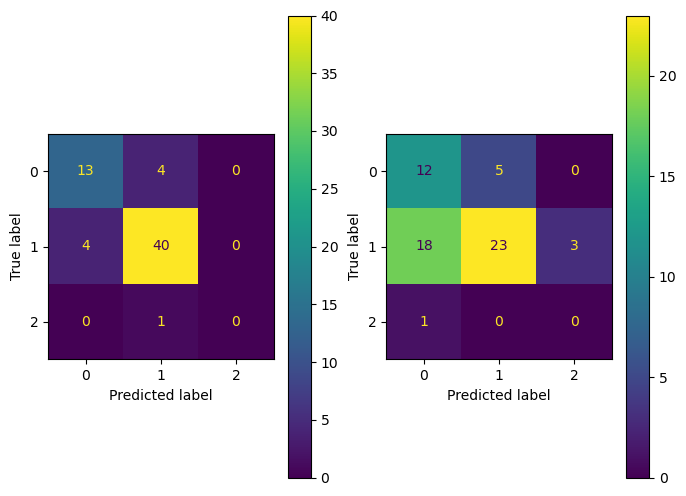

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

conf_matrix_tree = confusion_matrix(y_valid_transformed, y_pred_tree)
conf_matrix_knn = confusion_matrix(y_valid_transformed, y_pred_knn)

fig, axes = plt.subplots(1, 2, figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(conf_matrix_tree, display_labels=tree.classes_)
display.plot(ax=axes[0])

display = ConfusionMatrixDisplay(conf_matrix_knn, display_labels=knn.classes_)
display.plot(ax=axes[1])

In [ ]:
test = pipeline_preprocessing.transform(test)
y_test_pred = tree.predict(test)
ans_df = pd.DataFrame(y_test_pred, columns=['Onshore/Offshore '])

ans_df.reset_index(inplace=True)
ans_df.to_csv('submition.csv', index=False)

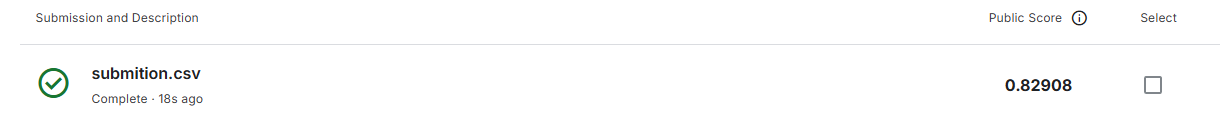